# User Guide + 10 in to pandas

In [2]:
import pandas as pd
pd.DataFrame({'A': [1, 2, 3]})

,A
0,1
1,2
2,3


# 10 minutes to pandas

In [3]:
import numpy as np
import pandas as pd

## Object Creation

In [4]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [5]:
dates = pd.date_range("20130101", periods=6)
print(dates)

df = pd.DataFrame(np.random.randn(6, 4), index = dates, columns=list('ABCD'))
print(df)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')
                   A         B         C         D
2013-01-01 -0.161012 -0.603651  0.338926 -0.248115
2013-01-02  1.033546 -0.877654  0.671714  0.267203
2013-01-03  0.152089  0.056230  2.165897  1.190434
2013-01-04  1.242122 -2.057892  0.029501 -0.214522
2013-01-05  0.500826 -0.395227  1.748538 -1.694144
2013-01-06 -1.231228  0.813821 -0.740683  1.447673


In [6]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
print(df2)
print('----------------')
print(df2.dtypes)

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo
----------------
A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object


## Viewing Data

In [7]:
df.head()

,A,B,C,D
2013-01-01,-0.161012,-0.603651,0.338926,-0.248115
2013-01-02,1.033546,-0.877654,0.671714,0.267203
2013-01-03,0.152089,0.056230,2.165897,1.190434
2013-01-04,1.242122,-2.057892,0.029501,-0.214522
2013-01-05,0.500826,-0.395227,1.748538,-1.694144


In [8]:
df.tail(3)

,A,B,C,D
2013-01-04,1.242122,-2.057892,0.029501,-0.214522
2013-01-05,0.500826,-0.395227,1.748538,-1.694144
2013-01-06,-1.231228,0.813821,-0.740683,1.447673


In [9]:
print(df.index)
print()
print(df.columns)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

Index(['A', 'B', 'C', 'D'], dtype='object')


In [10]:
df.to_numpy()

array([[-0.16101216, -0.60365096,  0.33892603, -0.24811465],
       [ 1.03354617, -0.87765403,  0.67171404,  0.26720303],
       [ 0.15208898,  0.05623047,  2.16589655,  1.19043386],
       [ 1.24212214, -2.05789156,  0.02950051, -0.21452173],
       [ 0.50082553, -0.3952271 ,  1.74853827, -1.69414416],
       [-1.23122835,  0.81382121, -0.74068276,  1.44767328]])

In [11]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [12]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.256057,-0.510729,0.702315,0.124755
std,0.898165,0.961894,1.086698,1.137419
min,-1.231228,-2.057892,-0.740683,-1.694144
25%,-0.082737,-0.809153,0.106857,-0.239716
50%,0.326457,-0.499439,0.505320,0.026341
75%,0.900366,-0.056634,1.479332,0.959626
max,1.242122,0.813821,2.165897,1.447673


In [13]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.161012,1.033546,0.152089,1.242122,0.500826,-1.231228
B,-0.603651,-0.877654,0.056230,-2.057892,-0.395227,0.813821
C,0.338926,0.671714,2.165897,0.029501,1.748538,-0.740683
D,-0.248115,0.267203,1.190434,-0.214522,-1.694144,1.447673


In [14]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.248115,0.338926,-0.603651,-0.161012
2013-01-02,0.267203,0.671714,-0.877654,1.033546
2013-01-03,1.190434,2.165897,0.056230,0.152089
2013-01-04,-0.214522,0.029501,-2.057892,1.242122
2013-01-05,-1.694144,1.748538,-0.395227,0.500826
2013-01-06,1.447673,-0.740683,0.813821,-1.231228


In [15]:
df.sort_values(by='B')

,A,B,C,D
2013-01-04,1.242122,-2.057892,0.029501,-0.214522
2013-01-02,1.033546,-0.877654,0.671714,0.267203
2013-01-01,-0.161012,-0.603651,0.338926,-0.248115
2013-01-05,0.500826,-0.395227,1.748538,-1.694144
2013-01-03,0.152089,0.056230,2.165897,1.190434
2013-01-06,-1.231228,0.813821,-0.740683,1.447673


## Selection

In [16]:
df["A"]

2013-01-01   -0.161012
2013-01-02    1.033546
2013-01-03    0.152089
2013-01-04    1.242122
2013-01-05    0.500826
2013-01-06   -1.231228
Freq: D, Name: A, dtype: float64

In [17]:
print(df[0:3])
print()
print(df["20130102":"20130104"])

                   A         B         C         D
2013-01-01 -0.161012 -0.603651  0.338926 -0.248115
2013-01-02  1.033546 -0.877654  0.671714  0.267203
2013-01-03  0.152089  0.056230  2.165897  1.190434

                   A         B         C         D
2013-01-02  1.033546 -0.877654  0.671714  0.267203
2013-01-03  0.152089  0.056230  2.165897  1.190434
2013-01-04  1.242122 -2.057892  0.029501 -0.214522


In [18]:
# Selection by Label

print(df.loc[dates[0]])
print()
print(df.loc[:, ['A', 'B']])
print()
print(df.loc["20130102":"20130104", ["A", "B"]])
print()
print(df.loc[dates[0], 'A'])
print()
print(df.at[dates[0], 'A'])


A   -0.161012
B   -0.603651
C    0.338926
D   -0.248115
Name: 2013-01-01 00:00:00, dtype: float64

                   A         B
2013-01-01 -0.161012 -0.603651
2013-01-02  1.033546 -0.877654
2013-01-03  0.152089  0.056230
2013-01-04  1.242122 -2.057892
2013-01-05  0.500826 -0.395227
2013-01-06 -1.231228  0.813821

                   A         B
2013-01-02  1.033546 -0.877654
2013-01-03  0.152089  0.056230
2013-01-04  1.242122 -2.057892

-0.1610121610166772

-0.1610121610166772


In [19]:
# Selection by position

print(df.iloc[3])
print()
print(df.iloc[3:5, 0:2])
print()
print(df.iloc[[1, 2, 4], [0, 2]])
print()
print(df.iloc[1:3, :])
print()
print(df.iloc[:, 1:3])
print()
print(df.iloc[1, 1])
print()
print(df.iat[1, 1])

A    1.242122
B   -2.057892
C    0.029501
D   -0.214522
Name: 2013-01-04 00:00:00, dtype: float64

                   A         B
2013-01-04  1.242122 -2.057892
2013-01-05  0.500826 -0.395227

                   A         C
2013-01-02  1.033546  0.671714
2013-01-03  0.152089  2.165897
2013-01-05  0.500826  1.748538

                   A         B         C         D
2013-01-02  1.033546 -0.877654  0.671714  0.267203
2013-01-03  0.152089  0.056230  2.165897  1.190434

                   B         C
2013-01-01 -0.603651  0.338926
2013-01-02 -0.877654  0.671714
2013-01-03  0.056230  2.165897
2013-01-04 -2.057892  0.029501
2013-01-05 -0.395227  1.748538
2013-01-06  0.813821 -0.740683

-0.877654027397275

-0.877654027397275


In [20]:
# Boolean indexing

print(df[df['A'] > 0])
print()
print(df[df>0])
print()

                   A         B         C         D
2013-01-02  1.033546 -0.877654  0.671714  0.267203
2013-01-03  0.152089  0.056230  2.165897  1.190434
2013-01-04  1.242122 -2.057892  0.029501 -0.214522
2013-01-05  0.500826 -0.395227  1.748538 -1.694144

                   A         B         C         D
2013-01-01       NaN       NaN  0.338926       NaN
2013-01-02  1.033546       NaN  0.671714  0.267203
2013-01-03  0.152089  0.056230  2.165897  1.190434
2013-01-04  1.242122       NaN  0.029501       NaN
2013-01-05  0.500826       NaN  1.748538       NaN
2013-01-06       NaN  0.813821       NaN  1.447673



In [21]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
print(df2)
print()
print(df2[df2['E'].isin(['two', 'four'])])

                   A         B         C         D      E
2013-01-01 -0.161012 -0.603651  0.338926 -0.248115    one
2013-01-02  1.033546 -0.877654  0.671714  0.267203    one
2013-01-03  0.152089  0.056230  2.165897  1.190434    two
2013-01-04  1.242122 -2.057892  0.029501 -0.214522  three
2013-01-05  0.500826 -0.395227  1.748538 -1.694144   four
2013-01-06 -1.231228  0.813821 -0.740683  1.447673  three

                   A         B         C         D     E
2013-01-03  0.152089  0.056230  2.165897  1.190434   two
2013-01-05  0.500826 -0.395227  1.748538 -1.694144  four


In [22]:
# Setting
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
print(s1)
df['F'] = s1
print()

df.at[dates[0], 'A'] = 0
df.iat[0, 1] = 0
df.loc[:, 'D'] = np.array([5]*len(df))
print(df)

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

                   A         B         C    D    F
2013-01-01  0.000000  0.000000  0.338926  5.0  NaN
2013-01-02  1.033546 -0.877654  0.671714  5.0  1.0
2013-01-03  0.152089  0.056230  2.165897  5.0  2.0
2013-01-04  1.242122 -2.057892  0.029501  5.0  3.0
2013-01-05  0.500826 -0.395227  1.748538  5.0  4.0
2013-01-06 -1.231228  0.813821 -0.740683  5.0  5.0


In [23]:
df2 = df.copy()
df2[df2>0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.338926,-5.0,NaN
2013-01-02,-1.033546,-0.877654,-0.671714,-5.0,-1.0
2013-01-03,-0.152089,-0.056230,-2.165897,-5.0,-2.0
2013-01-04,-1.242122,-2.057892,-0.029501,-5.0,-3.0
2013-01-05,-0.500826,-0.395227,-1.748538,-5.0,-4.0
2013-01-06,-1.231228,-0.813821,-0.740683,-5.0,-5.0


In [24]:
# Missing Data

df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E"] = 1
print(df1)
print()
print(df1.dropna(how='any'))
print()
print(df1.fillna(value=5))
print()
print(pd.isna(df1))

                   A         B         C    D    F    E
2013-01-01  0.000000  0.000000  0.338926  5.0  NaN  1.0
2013-01-02  1.033546 -0.877654  0.671714  5.0  1.0  1.0
2013-01-03  0.152089  0.056230  2.165897  5.0  2.0  NaN
2013-01-04  1.242122 -2.057892  0.029501  5.0  3.0  NaN

                   A         B         C    D    F    E
2013-01-02  1.033546 -0.877654  0.671714  5.0  1.0  1.0

                   A         B         C    D    F    E
2013-01-01  0.000000  0.000000  0.338926  5.0  5.0  1.0
2013-01-02  1.033546 -0.877654  0.671714  5.0  1.0  1.0
2013-01-03  0.152089  0.056230  2.165897  5.0  2.0  5.0
2013-01-04  1.242122 -2.057892  0.029501  5.0  3.0  5.0

                A      B      C      D      F      E
2013-01-01  False  False  False  False   True  False
2013-01-02  False  False  False  False  False  False
2013-01-03  False  False  False  False  False   True
2013-01-04  False  False  False  False  False   True


## Operations

In [25]:
# Stats

print(df.mean())
print()
print(df.mean(axis=1))
print()

s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
print(s)
print()
print(df.sub(s, axis='index'))

A    0.282892
B   -0.410120
C    0.702315
D    5.000000
F    3.000000
dtype: float64

2013-01-01    1.334732
2013-01-02    1.365521
2013-01-03    1.874843
2013-01-04    1.442746
2013-01-05    2.170827
2013-01-06    1.768382
Freq: D, dtype: float64

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

                   A         B         C    D    F
2013-01-01       NaN       NaN       NaN  NaN  NaN
2013-01-02       NaN       NaN       NaN  NaN  NaN
2013-01-03 -0.847911 -0.943770  1.165897  4.0  1.0
2013-01-04 -1.757878 -5.057892 -2.970499  2.0  0.0
2013-01-05 -4.499174 -5.395227 -3.251462  0.0 -1.0
2013-01-06       NaN       NaN       NaN  NaN  NaN


In [26]:
# User defined functions
print(df.agg(lambda x: np.mean(x) * 5.6))
print()
print(df.transform(lambda x: x*101.2))

A     1.584198
B    -2.296673
C     3.932966
D    28.000000
F    16.800000
dtype: float64

                     A           B           C      D      F
2013-01-01    0.000000    0.000000   34.299314  506.0    NaN
2013-01-02  104.594872  -88.818588   67.977461  506.0  101.2
2013-01-03   15.391405    5.690524  219.188731  506.0  202.4
2013-01-04  125.702761 -208.258626    2.985452  506.0  303.6
2013-01-05   50.683544  -39.996983  176.952073  506.0  404.8
2013-01-06 -124.600309   82.358706  -74.957096  506.0  506.0


In [27]:
# Value Counts
s = pd.Series(np.random.randint(0, 7, size=10))
print(s)
print()
print(s.value_counts())

0    6
1    4
2    0
3    4
4    5
5    6
6    5
7    4
8    0
9    1
dtype: int64

4    3
6    2
0    2
5    2
1    1
Name: count, dtype: int64


In [28]:
# String Methods
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

In [29]:
# Concat

df = pd.DataFrame(np.random.randn(10, 4))
print(df)
print()

pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

          0         1         2         3
0  0.534012 -1.309577 -0.432055  2.459372
1 -0.708092  1.418254  1.263846  0.216596
2  0.350564  0.293345  0.792735  0.285862
3  0.441512  0.206636  1.751228 -0.253663
4 -0.547794 -0.260146  0.021149  0.176602
5  1.324203 -0.724162 -0.463174  0.901019
6 -0.738251  0.003482 -0.398215 -0.266603
7 -0.363901  1.837557 -0.488317 -0.630240
8  0.257811 -0.583739 -0.812152  1.231449
9 -2.285310 -1.602791  1.890127  0.653697



,0,1,2,3
0,0.534012,-1.309577,-0.432055,2.459372
1,-0.708092,1.418254,1.263846,0.216596
2,0.350564,0.293345,0.792735,0.285862
3,0.441512,0.206636,1.751228,-0.253663
4,-0.547794,-0.260146,0.021149,0.176602
5,1.324203,-0.724162,-0.463174,0.901019
6,-0.738251,0.003482,-0.398215,-0.266603
7,-0.363901,1.837557,-0.488317,-0.630240
8,0.257811,-0.583739,-0.812152,1.231449
9,-2.285310,-1.602791,1.890127,0.653697


In [30]:
# Join
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
print(left)
print()
print(right)
print()
print(pd.merge(left, right, on="key"))

print()
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})
print(left)
print()
print(right)
print()
print(pd.merge(left, right, on="key"))


   key  lval
0  foo     1
1  foo     2

   key  rval
0  foo     4
1  foo     5

   key  lval  rval
0  foo     1     4
1  foo     1     5
2  foo     2     4
3  foo     2     5

   key  lval
0  foo     1
1  bar     2

   key  rval
0  foo     4
1  bar     5

   key  lval  rval
0  foo     1     4
1  bar     2     5


## Grouping

In [31]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
print(df)

print(df.groupby("A")[["C", "D"]].sum())
print()
print(df.groupby(["A", "B"]).sum())

     A      B         C         D
0  foo    one  0.867389  1.010137
1  bar    one -1.015098 -2.888278
2  foo    two  0.689538  1.469281
3  bar  three  0.116752  2.809248
4  foo    two -0.906257  2.007180
5  bar    two -0.310467  1.326912
6  foo    one  0.748492  1.413242
7  foo  three  1.438314  0.067458
            C         D
A                      
bar -1.208813  1.247882
foo  2.837476  5.967297

                  C         D
A   B                        
bar one   -1.015098 -2.888278
    three  0.116752  2.809248
    two   -0.310467  1.326912
foo one    1.615881  2.423379
    three  1.438314  0.067458
    two   -0.216719  3.476461


## Reshaping

In [32]:
# Stack

arrays = [
   ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
   ["one", "two", "one", "two", "one", "two", "one", "two"],
]

index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])
print(index)
print()

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

df2 = df[:4]

df2

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])



A         B
first second                    
bar   one    -0.409041  1.451089
      two    -0.575701  0.384822
baz   one     0.415662 -0.412354
      two    -1.120753 -1.088703

In [33]:
stacked = df2.stack(future_stack=True)
stacked

first  second   
bar    one     A   -0.409041
               B    1.451089
       two     A   -0.575701
               B    0.384822
baz    one     A    0.415662
               B   -0.412354
       two     A   -1.120753
               B   -1.088703
dtype: float64

In [34]:
print(stacked.unstack())
print()
print(stacked.unstack(1))
print()
print(stacked.unstack(0))

                     A         B
first second                    
bar   one    -0.409041  1.451089
      two    -0.575701  0.384822
baz   one     0.415662 -0.412354
      two    -1.120753 -1.088703

second        one       two
first                      
bar   A -0.409041 -0.575701
      B  1.451089  0.384822
baz   A  0.415662 -1.120753
      B -0.412354 -1.088703

first          bar       baz
second                      
one    A -0.409041  0.415662
       B  1.451089 -0.412354
two    A -0.575701 -1.120753
       B  0.384822 -1.088703


In [35]:
# Pivot Tables
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,-0.536731,-0.799025
1,one,B,foo,-0.399591,0.971581
2,two,C,foo,-0.081469,0.353175
3,three,A,bar,0.756276,0.974921
4,one,B,bar,-0.636014,-0.230933
5,one,C,bar,-1.652572,0.138227
6,two,A,foo,0.960310,0.850667
7,three,B,foo,0.212524,1.337404
8,one,C,foo,-0.181355,-0.560126
9,one,A,bar,-1.444592,1.638385


In [36]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -1.444592 -0.536731
      B -0.636014 -0.399591
      C -1.652572 -0.181355
three A  0.756276       NaN
      B       NaN  0.212524
      C  0.290599       NaN
two   A       NaN  0.960310
      B  0.184303       NaN
      C       NaN -0.081469

In [37]:
# Time Series
rng = pd.date_range("1/1/2012", periods=100, freq="s")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
print(ts.resample("5Min").sum())
print()

rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
print(ts)
print()

ts_utc = ts.tz_localize("UTC")
print(ts_utc)
print()

print(ts_utc.tz_convert("US/Eastern"))
print()

print(rng)
print()
print(rng + pd.offsets.BusinessDay(5))

2012-01-01    24685
Freq: 5min, dtype: int64

2012-03-06    0.567577
2012-03-07    1.007276
2012-03-08    1.556832
2012-03-09    0.658839
2012-03-10    0.163759
Freq: D, dtype: float64

2012-03-06 00:00:00+00:00    0.567577
2012-03-07 00:00:00+00:00    1.007276
2012-03-08 00:00:00+00:00    1.556832
2012-03-09 00:00:00+00:00    0.658839
2012-03-10 00:00:00+00:00    0.163759
Freq: D, dtype: float64

2012-03-05 19:00:00-05:00    0.567577
2012-03-06 19:00:00-05:00    1.007276
2012-03-07 19:00:00-05:00    1.556832
2012-03-08 19:00:00-05:00    0.658839
2012-03-09 19:00:00-05:00    0.163759
Freq: D, dtype: float64

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

DatetimeIndex(['2012-03-13', '2012-03-14', '2012-03-15', '2012-03-16',
               '2012-03-16'],
              dtype='datetime64[ns]', freq=None)


In [39]:
# Categoricals

df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df["grade"] = df["raw_grade"].astype("category")
print(df)
print()

df["grade"]

   id raw_grade grade
0   1         a     a
1   2         b     b
2   3         b     b
3   4         a     a
4   5         a     a
5   6         e     e



0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [40]:
new_categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.rename_categories(new_categories)
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [41]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [42]:
print(df.sort_values(by="grade"))
print()
print(df.groupby("grade", observed=False).size())


   id raw_grade      grade
5   6         e   very bad
1   2         b       good
2   3         b       good
0   1         a  very good
3   4         a  very good
4   5         a  very good

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64


## Plotting

In [44]:
import matplotlib.pyplot as plt

plt.close("all")

<Axes: >

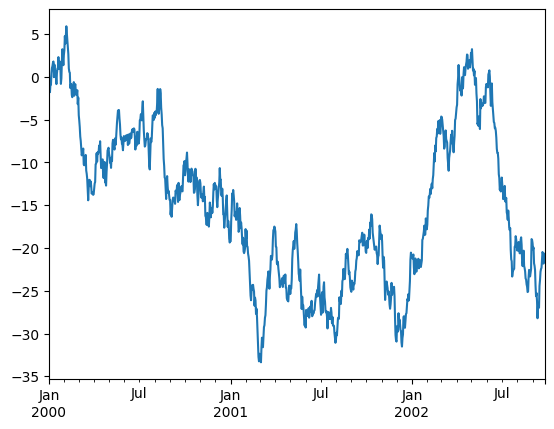

In [45]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 640x480 with 0 Axes>

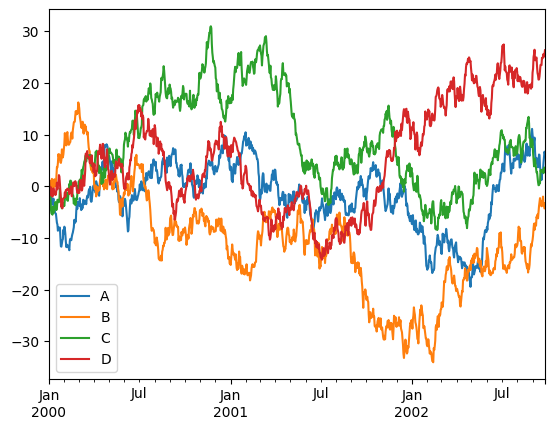

In [46]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best')

In [55]:
# Importing and exporting Data

df = pd.DataFrame(np.random.randint(0, 5, (10, 5)))
df.to_csv("files/foo.csv")
pd.read_csv("files/foo.csv")

,Unnamed: 0,0,1,2,3,4
0,0,0,0,0,0,3
1,1,3,4,2,3,0
2,2,3,0,4,0,0
3,3,1,0,2,4,0
4,4,3,1,0,3,1
5,5,0,1,4,4,4
6,6,4,1,1,0,1
7,7,2,3,4,0,3
8,8,4,2,0,0,1
9,9,2,0,2,2,4


In [56]:
df.to_parquet("files/foo.parquet")
pd.read_parquet("files/foo.parquet")

,0,1,2,3,4
0,0,0,0,0,3
1,3,4,2,3,0
2,3,0,4,0,0
3,1,0,2,4,0
4,3,1,0,3,1
5,0,1,4,4,4
6,4,1,1,0,1
7,2,3,4,0,3
8,4,2,0,0,1
9,2,0,2,2,4


In [57]:
df.to_excel("files/foo.xlsx", sheet_name="Sheet1")
pd.read_excel("files/foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,0,1,2,3,4
0,0,0,0,0,0,3
1,1,3,4,2,3,0
2,2,3,0,4,0,0
3,3,1,0,2,4,0
4,4,3,1,0,3,1
5,5,0,1,4,4,4
6,6,4,1,1,0,1
7,7,2,3,4,0,3
8,8,4,2,0,0,1
9,9,2,0,2,2,4
